# EXERCISE 1: Time Series Analysis

Author name: Aradhya Goswami BTECH DSE Section B Batch 1 Week 7

In [102]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from pylab import rcParams



df=pd.read_csv('employment.csv', parse_dates=True,index_col="datestamp")
df

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1


### 1.Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column:


In [18]:
print("NUMBER OF MISSING VALUES FOR EACH COLUMN IS AS FOLLOWS: ")
df.isnull().sum()

NUMBER OF MISSING VALUES FOR EACH COLUMN IS AS FOLLOWS: 


Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

### 2.Generate a boxplot to find the distribution of unemployment rate for every industry:

[Text(0.5, 1.0, 'UNEMPLOYMENT RATE VS INDUSTRY')]

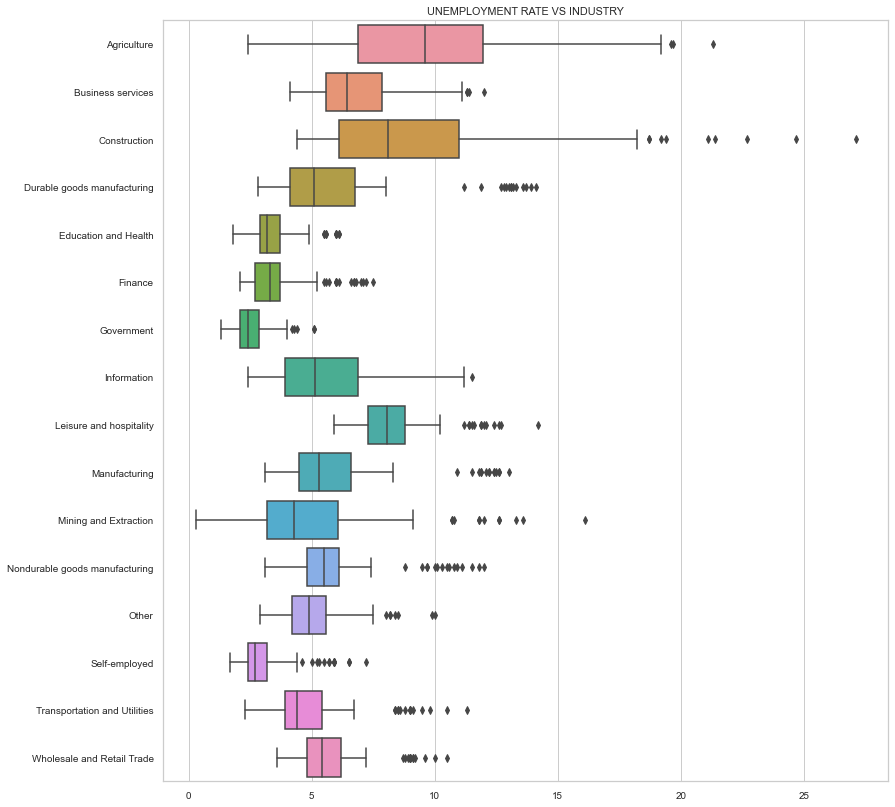

In [71]:
sns.set(rc={'figure.figsize':(13,14)}, font_scale=0.9, style='whitegrid')
sns.boxplot(data=df,orient='h').set(title="UNEMPLOYMENT RATE VS INDUSTRY")

### 3.Using line chart Visualize the unemployment rate of workers by industry.

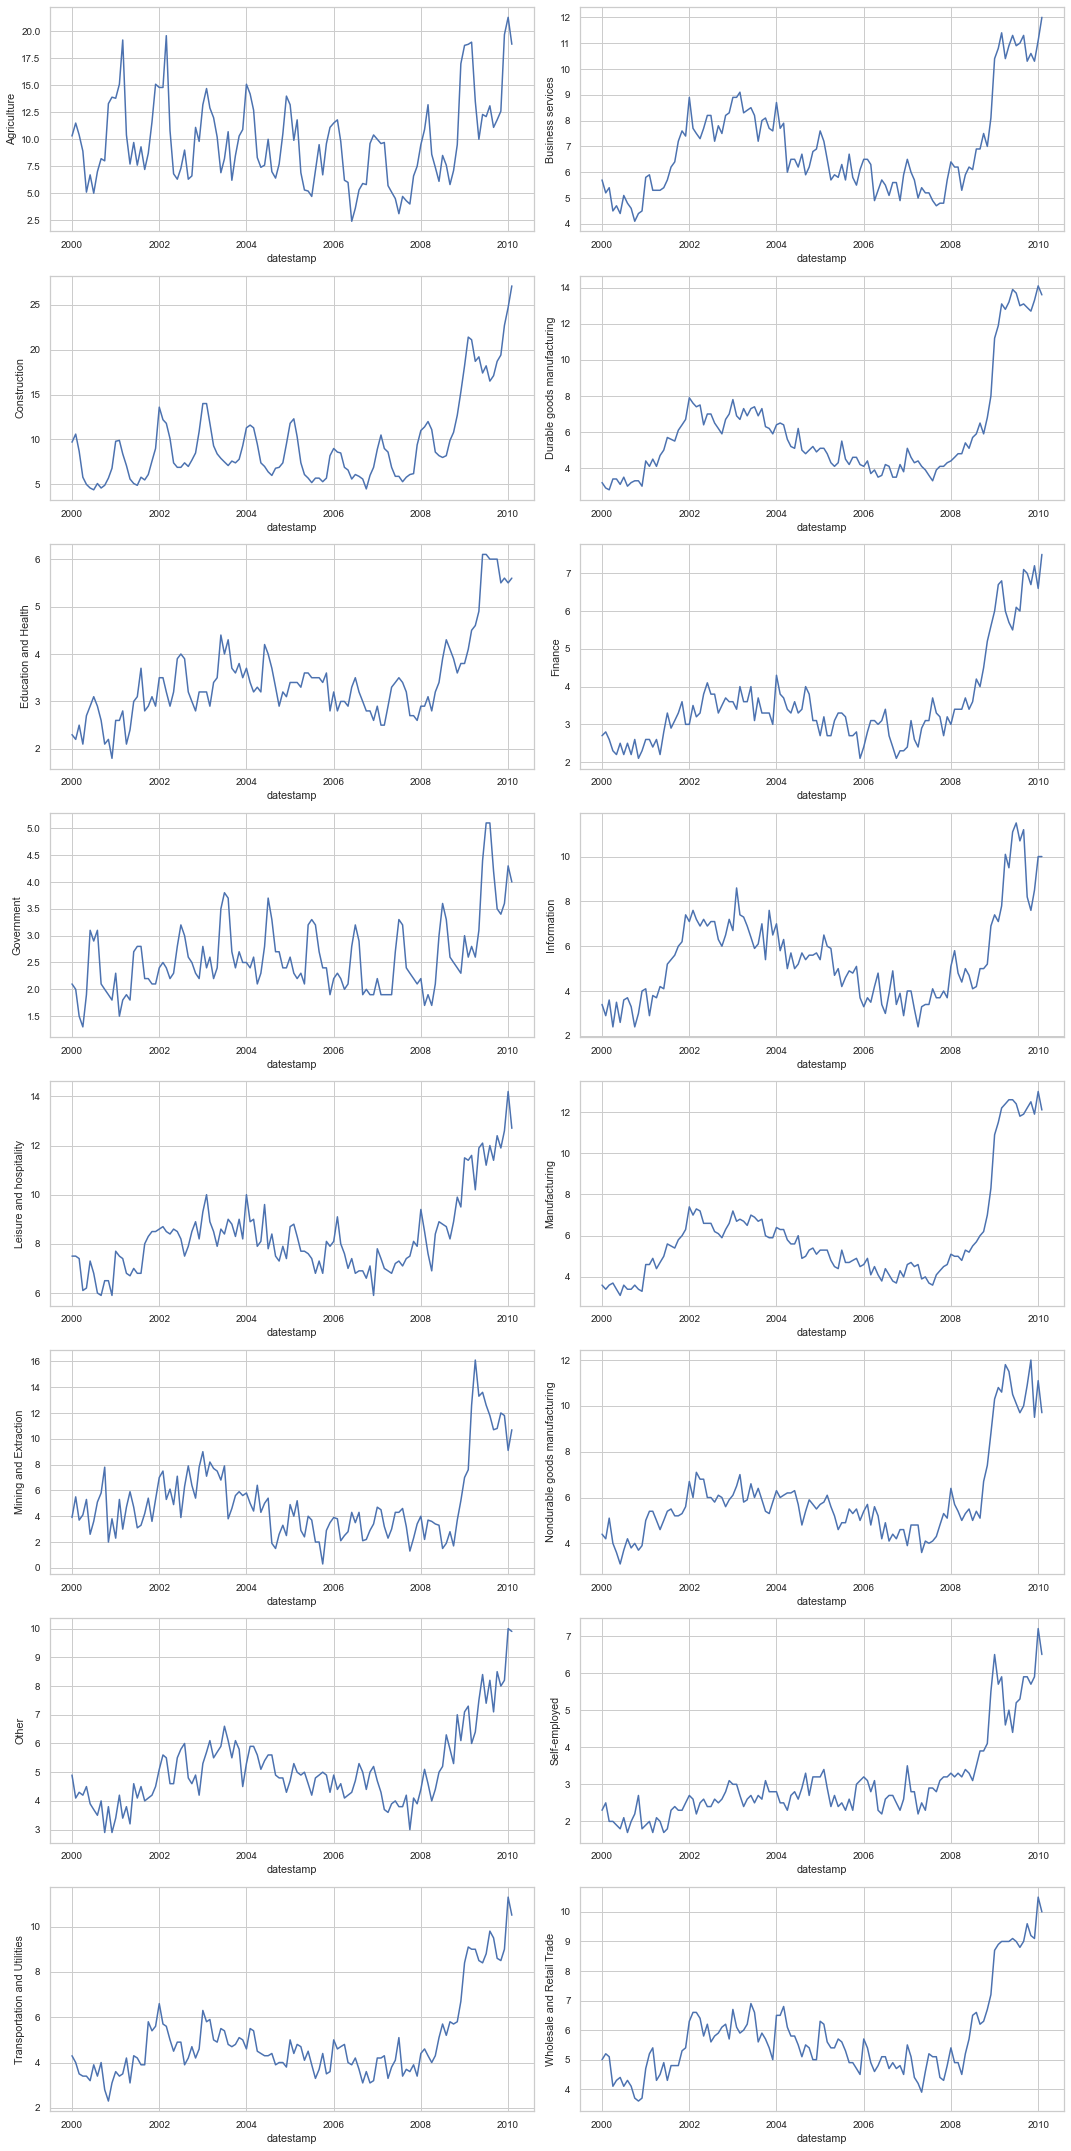

In [79]:
a,b=0,0
fig, axs = plt.subplots(8,2, figsize = (15,30))
for i,j in enumerate(df.columns):
    z = 'plt'+str(i)
    exec("%s = %d" % (z,5000))
    z=sns.lineplot(x=df.index,y=df[j],ax=axs[a,b])
    if b==1:
        a+=1
        b=0
    else:
        b+=1
plt.tight_layout()

### 4.Plot the monthly and yearly trends.

MONTHLY TREND IS AS FOLLOWS: 


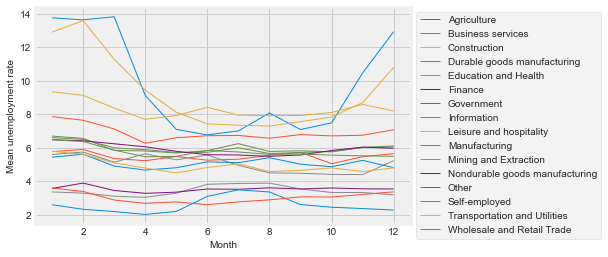

In [111]:
print("MONTHLY TREND IS AS FOLLOWS: ")
index_month = df.index.month
emp_by_month = df.groupby(index_month).mean()
ax=emp_by_month.plot(fontsize=10, linewidth=1)
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(1,1), fontsize=10)

YEARLY TREND IS AS FOLLOWS: 


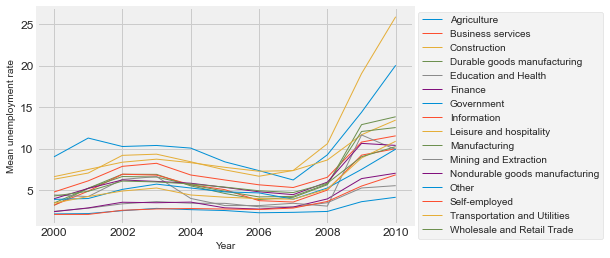

In [112]:
print("YEARLY TREND IS AS FOLLOWS: ")
index_year=df.index.year
emp_by_year =df.groupby(index_year).mean()
ax =emp_by_year.plot(fontsize=12, linewidth=1)
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Mean unemployment rate', fontsize=10);
ax.legend(bbox_to_anchor=(1,1), fontsize=10);

### 5.Apply time series decomposition to your dataset to visualize the trend and seasonality:

In [152]:
emp_decomp ={}
emp_names =df.columns
for ts in emp_names:
    ts_decomp= sm.tsa.seasonal_decompose(df[ts])
    emp_decomp[ts]=ts_decomp

In [154]:
emp_decomp.plot()

AttributeError: 'dict' object has no attribute 'plot'

### 6.Visualize the seasonality of Agriculture, Health and Finance sector:

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

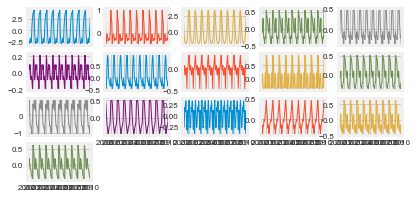

In [150]:

jobs_seasonal = {}
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)
seasonality_df.index.name =None
seasonality_df.plot(subplots=True,layout=(5,5),fontsize=8,linewidth=1,legend=False)

### 7.Visualize the seasonality of multiple time series and the correlation between each time series in the dataset:


CORRELATION BETWEEN EACH TIME SERIES IS: 


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

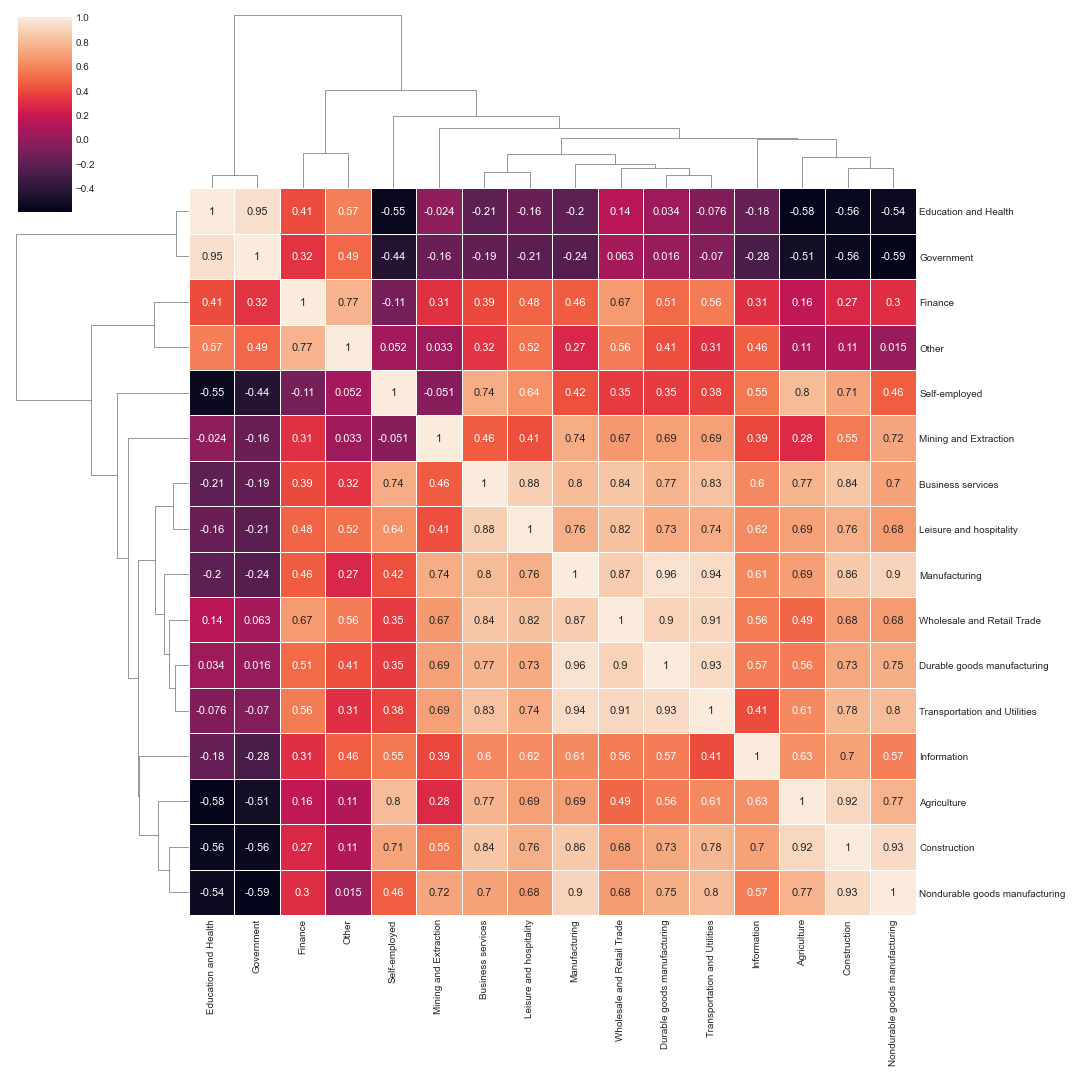

In [147]:
print("CORRELATION BETWEEN EACH TIME SERIES IS: ")
seasonal_corr=seasonality_df.corr()
f=sns.clustermap(seasonal_corr,linewidths=0.8,figsize=(15, 15),annot=True,annot_kws={"size":11})
plt.setp(f.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(f.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)